In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install feature-engine

     |████████████████████████████████| 225kB 8.0MB/s 
ERROR: allennlp 0.9.0 requires flaky, which is not installed.
ERROR: allennlp 0.9.0 requires responses>=0.7, which is not installed.
ERROR: allennlp 0.9.0 has requirement spacy<2.2,>=2.1.0, but you'll have spacy 2.2.1 which is incompatible.
ERROR: allennlp 0.9.0 has requirement torch>=1.2.0, but you'll have torch 1.1.0 which is incompatible.
  Found existing installation: pytest 5.0.1
    Uninstalling pytest-5.0.1:
      Successfully uninstalled pytest-5.0.1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from feature_engine.discretisers import EqualWidthDiscretiser
from feature_engine.categorical_encoders import RareLabelCategoricalEncoder
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV

In [5]:
train=pd.read_csv('/kaggle/input/adult-census-income/adult.csv')

In [6]:
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education.num     32561 non-null int64
marital.status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital.gain      32561 non-null int64
capital.loss      32561 non-null int64
hours.per.week    32561 non-null int64
native.country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
train.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

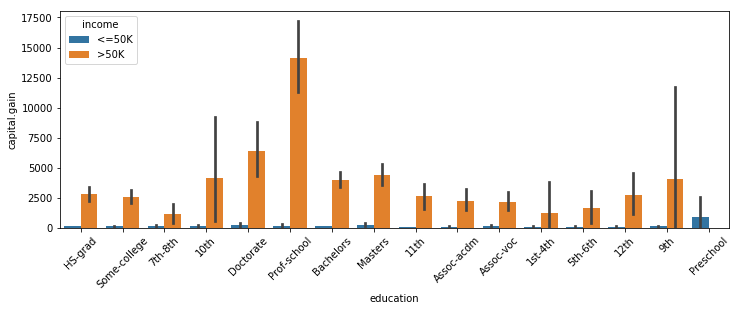

In [9]:
# We plot to see the capital gains of people with income greater 50k and also less than 50k

plt.figure(figsize=(12,4))
sns.barplot(x='education',hue='income',y='capital.gain',data=train)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

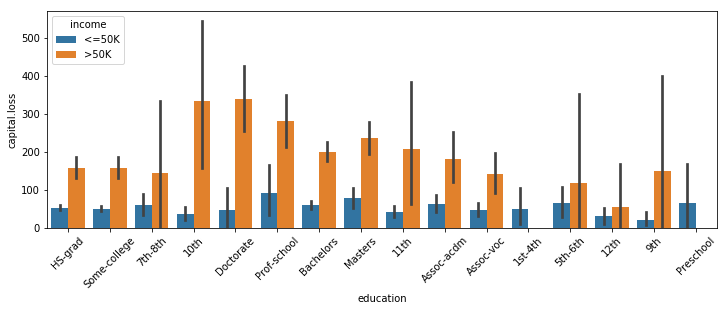

In [10]:
# We similarly plot to see the capital losses of people with income greater than 50k and also less than 50k

plt.figure(figsize=(12,4))
sns.barplot(x='education',hue='income',y='capital.loss',data=train)
plt.xticks(rotation=45)

From the above two plots we are able to understand that people with a income greater than 50k tend to make more capital gains while at the same time incur more capital lose

In [11]:
train.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


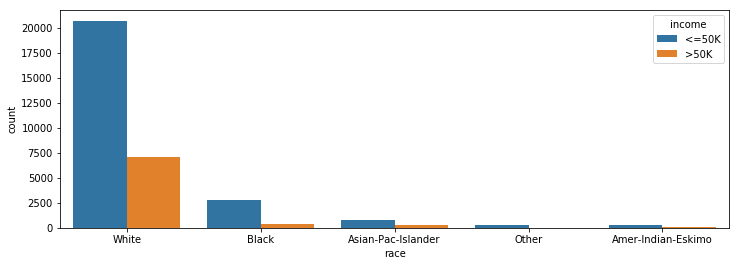

In [12]:
# We plot to see if race has effect on the income of the person.
plt.figure(figsize=(12,4))
sns.countplot(x='race',hue='income',data=train)

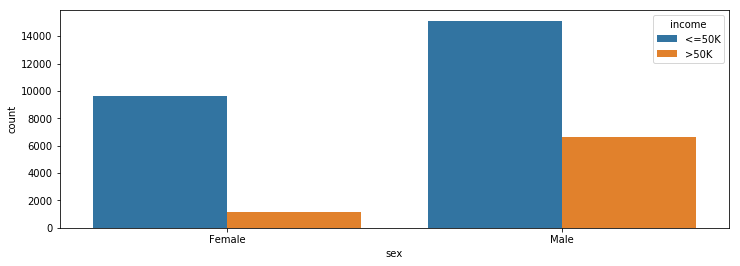

In [13]:
# We plot to check if the sex has an effect on the income of a person
plt.figure(figsize=(12,4))
sns.countplot(x='sex',hue='income',data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

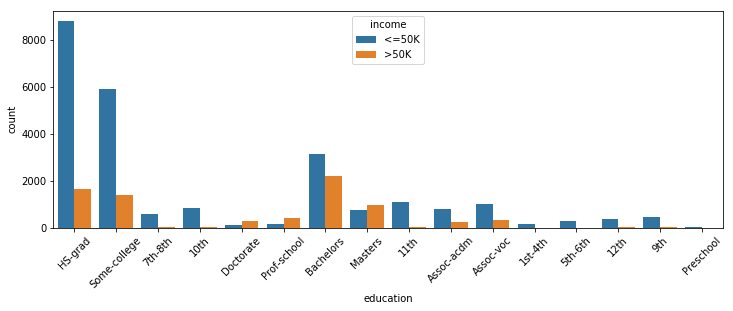

In [14]:
# We plot to find if education has an effect on the income of a person

plt.figure(figsize=(12,4))
sns.countplot(x='education',hue='income',data=train)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

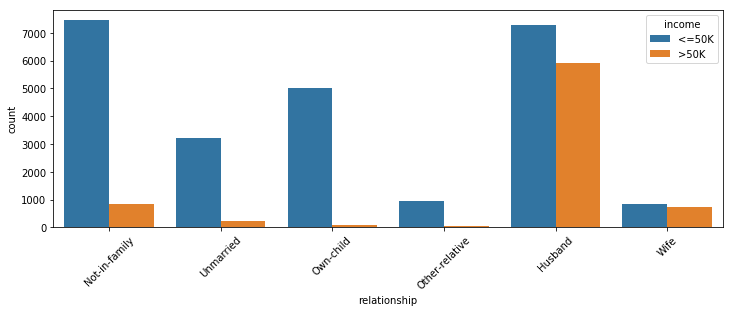

In [15]:
# We plot to see if being in a relationship has an effect on income
plt.figure(figsize=(12,4))
sns.countplot(x='relationship',hue='income',data=train)
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

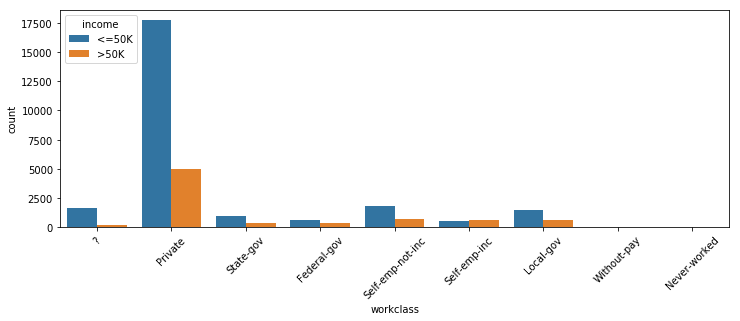

In [16]:
# We plot to the workclass to see if it has any effect on income
plt.figure(figsize=(12,4))
sns.countplot(x='workclass',hue='income',data=train)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

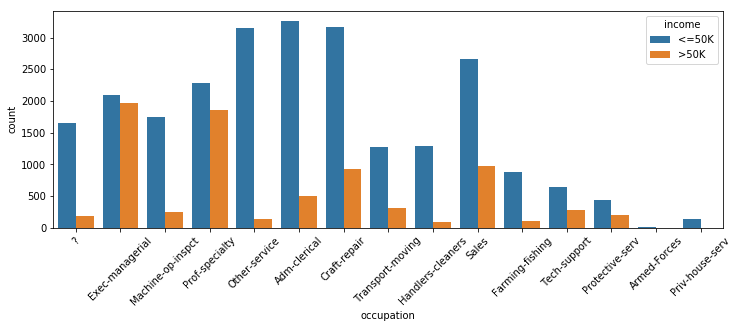

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(x='occupation',hue='income',data=train)
plt.xticks(rotation=45)

In [18]:
X=train.drop(columns='income')

y=train['income']

In [19]:
# We change the <=50K to 1 and >50K to 0 for ease of classification
y=y.map({'<=50K':0,'>50K':1})

In [20]:
# We split the dataset into train and test dataset

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
X_train['workclass'].value_counts()

Private             18106
Self-emp-not-inc     2055
Local-gov            1681
?                    1465
State-gov            1049
Self-emp-inc          899
Federal-gov           775
Without-pay            12
Never-worked            6
Name: workclass, dtype: int64

In [22]:
# We also the ? with the type as missing
X_train['workclass']=X_train['workclass'].replace({'Without-pay':'Never-worked','?':'Missing'}) # We replace the without pay and to never worked as they both imply the same thing.

X_test['workclass']=X_test['workclass'].replace({'Without-pay':'Never-worked','?':'Missing'}) 

In [23]:
# We change the ? to indicate it as missing
X_train['occupation']=X_train['occupation'].replace({'?':'Missing'})

X_test['occupation']=X_test['occupation'].replace({'?':'Missing'})

In [24]:
# We bin the age and hours per week columns

ewd=EqualWidthDiscretiser(bins=10,variables=['age','hours.per.week'])

ewd.fit(X_train)

X_train=ewd.transform(X_train)

X_test=ewd.transform(X_test)

In [25]:
X_train=X_train.drop(columns=['fnlwgt','education'])

X_test=X_test.drop(columns=['fnlwgt','education'])

In [26]:
# We create a list of categorical variables
qualitative=list(X_train.select_dtypes(include='object'))

qualitative

['workclass',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country']

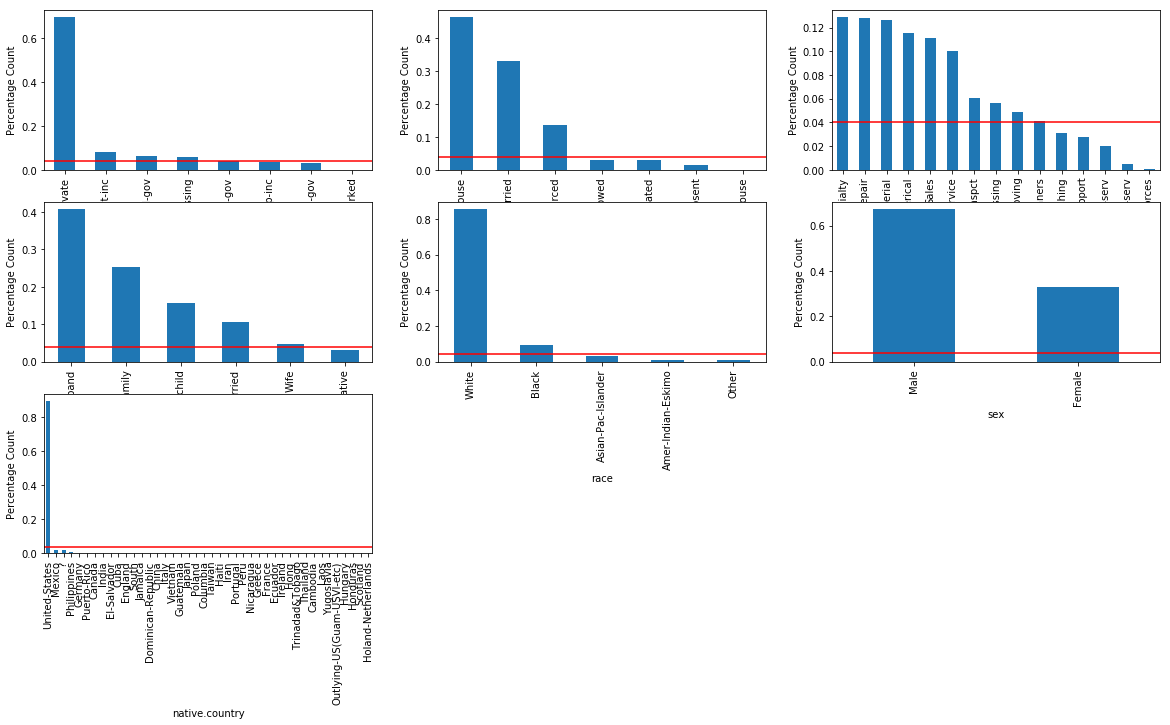

In [27]:
# Inorder to check the sparsity of the categorical variables we plot them on a graph.
count=1
plt.figure(figsize=(20,10))
for col in qualitative:
    temp_df = pd.Series(X_train[col].value_counts() / len(X_train) )

    # make plot with the above percentages
    plt.subplot(3,3, count)
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(col)
    
    # add a line at 4 % to flag the threshold for rare categories
    fig.axhline(y=0.04, color='red')
    fig.set_ylabel('Percentage Count')
    count +=1

In [28]:
# We impute rare labels to the native country column
rce=RareLabelCategoricalEncoder(tol=0.04,n_categories=2,variables='native.country')

rce.fit(X_train)

X_train=rce.transform(X_train)

X_test=rce.transform(X_test)

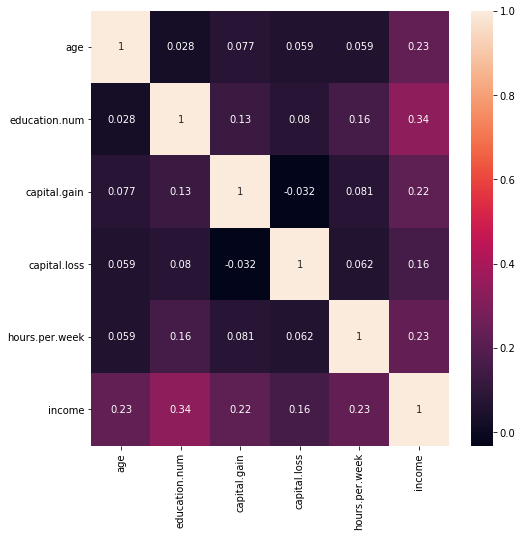

In [29]:
# We use the heatmap to find the most important features

data_com=pd.concat([X_train,y_train],axis=1)

data_com=data_com.corr()

plt.figure(figsize=(8,8))

sns.heatmap(data_com,annot=True)

all the features look have similar values we cant distinguish a least important feature

In [30]:
# We use one hot categorical encoder on the dataset

oce=OneHotCategoricalEncoder(drop_last=True)

oce.fit(X_train)

X_train=oce.transform(X_train)

X_test=oce.transform(X_test)

In [31]:
# We standard scale on the dataset

train_cols=X_train.columns

sc=StandardScaler()

sc.fit(X_train)

X_train=pd.DataFrame(sc.transform(X_train),columns=train_cols)

X_test=pd.DataFrame(sc.transform(X_test),columns=train_cols)

In [32]:
# We perform the random forest classifier on the dataset

classifier_rf=RandomForestClassifier(random_state=0)

classifier_rf.fit(X_train,y_train)

y_pred_rf=classifier_rf.predict(X_test)

In [33]:
# We find the classification report for the model

class_report=classification_report(y_pred_rf,y_test)

print('The classification report is \n{}'.format(class_report))

The classification report is 
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      5210
           1       0.61      0.73      0.67      1303

    accuracy                           0.85      6513
   macro avg       0.77      0.81      0.79      6513
weighted avg       0.87      0.85      0.86      6513



In [34]:
# We perform the gradient boost classifier on the dataset

classifier_gb=GradientBoostingClassifier(random_state=0)

classifier_gb.fit(X_train,y_train)

y_pred_gb=classifier_gb.predict(X_test)

In [35]:
# We find the classification report for the model

class_report=classification_report(y_pred_gb,y_test)

print('The classification report is \n{}'.format(class_report))

The classification report is 
              precision    recall  f1-score   support

           0       0.95      0.88      0.92      5353
           1       0.59      0.79      0.68      1160

    accuracy                           0.87      6513
   macro avg       0.77      0.84      0.80      6513
weighted avg       0.89      0.87      0.87      6513



In [36]:
# We perform the Extra Tree classifier on the dataset

classifier_ec=ExtraTreesClassifier(random_state=0)

classifier_ec.fit(X_train,y_train)

y_pred_ec=classifier_ec.predict(X_test)

In [37]:
# We find the classification report for the model

class_report=classification_report(y_pred_ec,y_test)

print('The classification report is \n{}'.format(class_report))

The classification report is 
              precision    recall  f1-score   support

           0       0.92      0.88      0.90      5201
           1       0.58      0.69      0.63      1312

    accuracy                           0.84      6513
   macro avg       0.75      0.78      0.76      6513
weighted avg       0.85      0.84      0.84      6513



In [38]:
# We use grid search to find the best parameters for the gradient boosting model

params=[{'learning_rate':[0.1,0.001,0.001],'n_estimators':[100,300,500,700,1000]}]

gsc=GridSearchCV(estimator=classifier_gb,param_grid=params,scoring='accuracy',n_jobs=-1,cv=5)

In [39]:
gsc.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
                                                  presort=

In [40]:
gsc.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [41]:
# We perform the gradient boost classifier on the dataset after finding the best parameters

classifier_gb1=GradientBoostingClassifier(n_estimators=500,random_state=0)

classifier_gb1.fit(X_train,y_train)

y_pred_gb1=classifier_gb1.predict(X_test)

In [42]:
# We find the classification report for the model

class_report=classification_report(y_pred_gb1,y_test)

print('The classification report is \n{}'.format(class_report))

The classification report is 
              precision    recall  f1-score   support

           0       0.94      0.89      0.92      5227
           1       0.64      0.77      0.70      1286

    accuracy                           0.87      6513
   macro avg       0.79      0.83      0.81      6513
weighted avg       0.88      0.87      0.87      6513



From the above report there is not much improvment in the accuracy